In [83]:
import kagglehub
pastorsoto_indian_market_path = kagglehub.dataset_download('pastorsoto/indian-market')

print('Data source import complete.')


Data source import complete.


### Loading the Libraries and the Data

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [85]:
df = pd.read_csv('/kaggle/input/indian-market/Indian_IPO_Market_Data.csv')
print(df.shape)
df.head()

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [86]:
for col in df.columns:
  print(col)

Date 
IPOName
Issue_Size
Subscription_QIB
Subscription_HNI
Subscription_RII
Subscription_Total
Issue_Price
Listing_Gains_Percent


In [87]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Electronics Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


In [88]:
df['Listing_Gains_Percent'].describe()

,Listing_Gains_Percent
count,319.000000
mean,4.742696
std,47.650946
min,-97.150000
25%,-11.555000
50%,1.810000
75%,25.310000
max,270.400000


The `Listing_Gains_Percent` variable interests us. This is the variable that will be used to create the target or outcome variable.

## Exploring the Data

In [89]:
df.isnull().sum()

,0
Date,0
IPOName,0
Issue_Size,0
Subscription_QIB,0
Subscription_HNI,0
Subscription_RII,0
Subscription_Total,0
Issue_Price,0
Listing_Gains_Percent,0


In [90]:
df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)

In [91]:
df['Listing_Gains_Profit'].describe()

,Listing_Gains_Profit
count,319.000000
mean,0.545455
std,0.498712
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [128]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

,proportion
Listing_Gains_Profit,
1,0.545455
0,0.454545


In [130]:
#df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    float64
 6   Listing_Gains_Profit  319 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.6 KB


We can see approximately 55% of the IPOs listed in profit, and we can also see that the data is fairly balanced. We have also dropped some of the variables that might not carry predictive power.

## Data Visualization

Summary Statistics

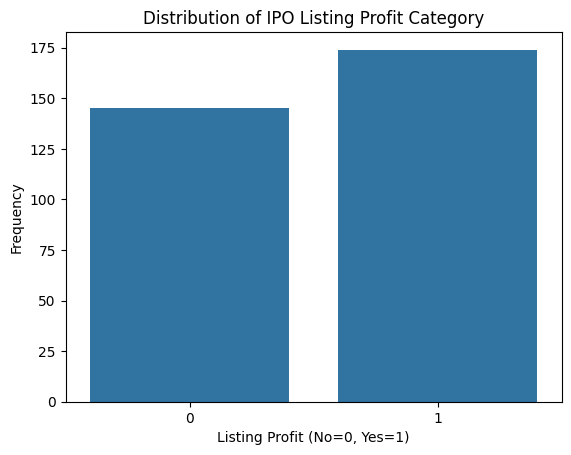

In [132]:
# visualizing the target variable
sns.countplot(x='Listing_Gains_Profit', data=df)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

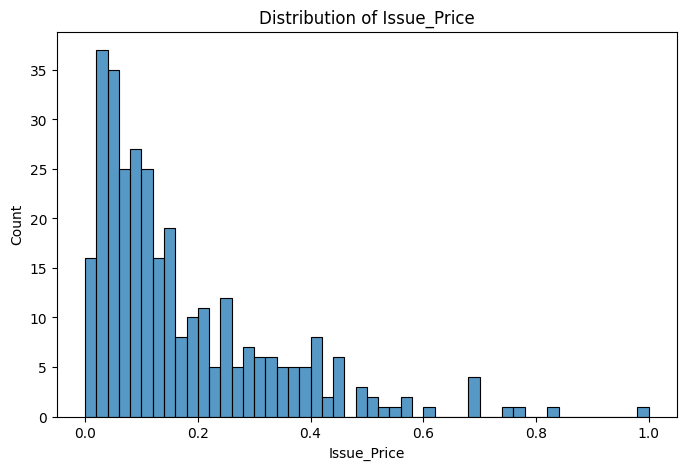

In [133]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

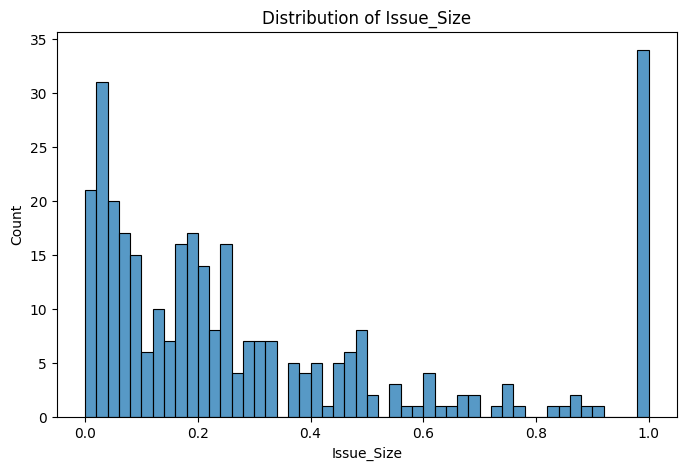

In [134]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

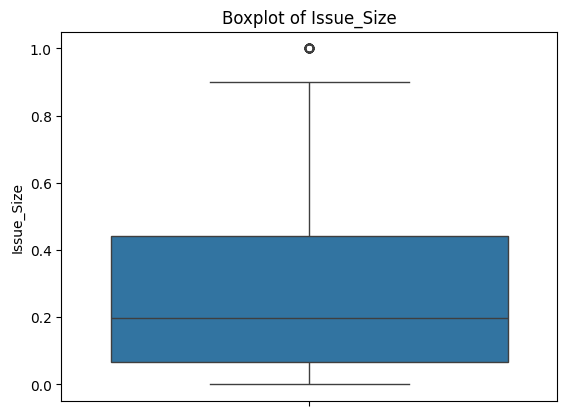

In [135]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

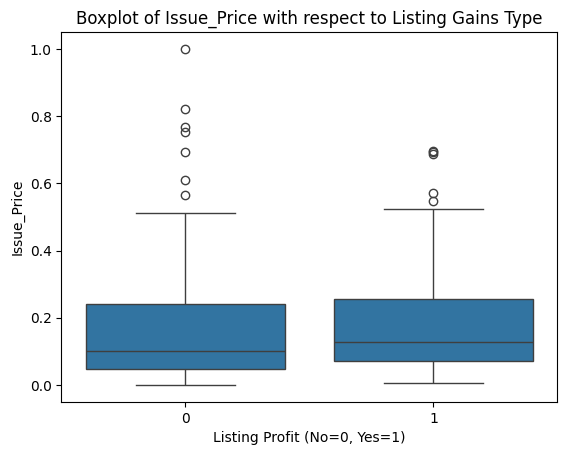

In [136]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

In [137]:
print(df.skew())

Issue_Size              1.224620
Subscription_QIB        1.262734
Subscription_HNI        1.181636
Subscription_RII        1.129171
Subscription_Total      1.293880
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


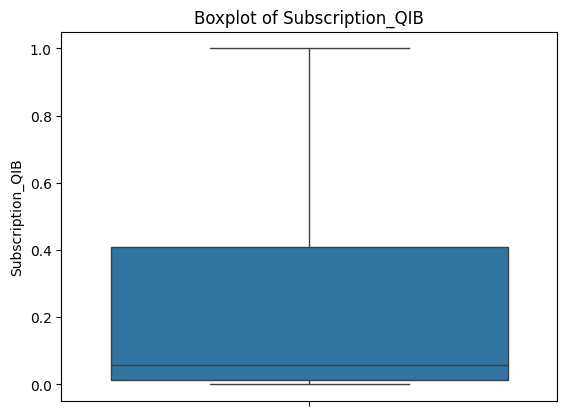

In [138]:
sns.boxplot(data=df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

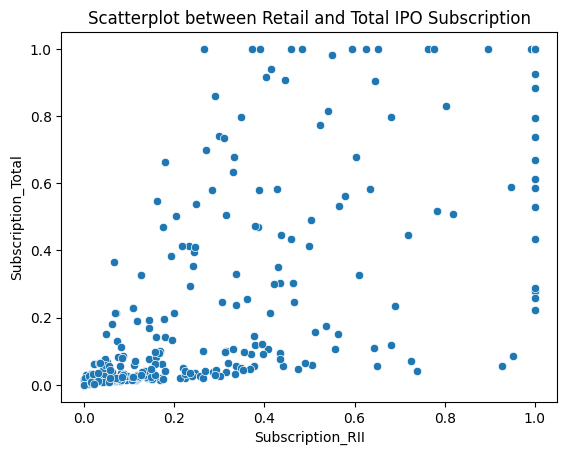

In [139]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

Here are some of the findings that we can draw from the visualizations above:

1. The histogram and the boxplots show that outliers are present in the data and might need outlier treatment.

2. The boxplot of `Issue_Price`, with respect to `Listing_Gains_Profit`, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.

3. We also observed a correlation between Retail and Total IPO Subscription via a scatterplot.

## Outlier Treatment

Since there are outliers in the data, we need to treat them. However, feel free to use a different approach or choose to work with outliers.

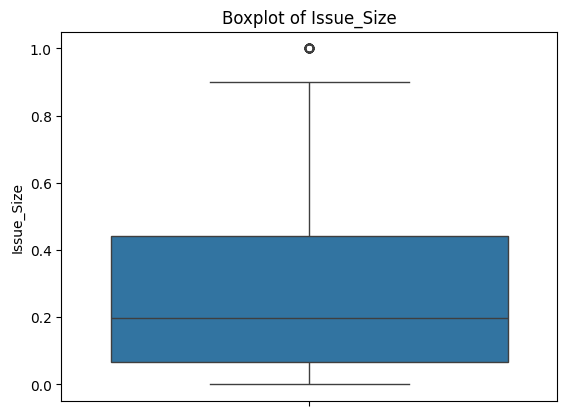

In [140]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

In [141]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 0.37292120845546295
lower = -0.49168483382185196
upper = 0.9999999999999998


In [142]:
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

,Issue_Size
count,319.000000
mean,0.305854
std,0.308308
min,0.000000
25%,0.067697
50%,0.198779
75%,0.440618
max,1.000000


In [143]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 0.39457946678450434
lower = -0.5783178671380174
upper = 1.0


In [144]:
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

,Subscription_QIB
count,319.000000
mean,0.253601
std,0.342961
min,0.000000
25%,0.013551
50%,0.058212
75%,0.408131
max,1.000000


In [145]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 0.39672654950930847
lower = -0.5869061980372339
upper = 1.0


In [146]:
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

,Subscription_HNI
count,319.000000
mean,0.263157
std,0.374477
min,0.000000
25%,0.008184
50%,0.033061
75%,0.404910
max,1.000000


In [147]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 0.3739795918367347
lower = -0.49591836734693884
upper = 1.0


In [148]:
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

,Subscription_RII
count,319.000000
mean,0.309232
std,0.315147
min,0.000000
25%,0.065051
50%,0.174490
75%,0.439031
max,1.000000


In [149]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 0.3918785485065417
lower = -0.5675141940261665
upper = 1.0000000000000002


In [150]:
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

,Subscription_Total
count,319.000000
mean,0.252489
std,0.335939
min,0.000000
25%,0.020304
50%,0.060849
75%,0.412182
max,1.000000


There are different approaches to outlier treatment, but the one we've used here is outlier identification using the interquartile menthod. Once we identified the outliers, we clipped the variable values between the upper and lower bounds. This is only one appoach — feel free to experiment with other methods.

## Setting the Target and Predictor Variables

In [151]:
target_variable = ['Listing_Gains_Profit']
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have created an object of the dependent variable called `target_variable` and also a list of all the features, excluding the target variable `Listing_Gains_Profit`. During data exploration, we observed that the distribution of the variables differed significantly. This could influence the modeling process, so to prevent this, we performed normalization by scaling the predictors. You can see that the normalized values of the predictors lie between 0 and 1.

## Validation- Holdout Approach

In [152]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


We will use the hold out validation approach to model evaluation. In this approach, we will divide the data in the 70:30 ratio, where we will use 70% of the data for training the model, while we will use the other 30% of the data to test the model. Feel free to use a different train-to-test ratio.

## Define the Deep Learning Classification Model

In [179]:
tf.random.set_seed(100)

model = tf.keras.Sequential()

# 4 hidden layer with ReLU

model.add(tf.keras.layers.Dense(64, input_shape =(X_train.shape[1],), activation = 'relu'))
#Dropout
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(32, activation= 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))

# 1 output node with  sigmoid
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 we have defined the model by instantiating the sequential model class in TensorFlow's Keras. The model architecture is comprised of four hidden layers with `relu` as the activation function. The output layer uses a `sigmoid` activation function, which is a good choice for a binary classification model. Feel free to experiment with different model architectures, activation functions, and the number of nodes in each layer!

## Compile and Train the Model

In [180]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [181]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [182]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4590 - loss: 0.6955
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5405 - loss: 0.6920 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 0.6875 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5414 - loss: 0.6832 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: 0.6766 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: 0.6705 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: 0.6621 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: 0.6557 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5155 - loss: 0.6546 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5044 - loss: 0.6488 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5981 - loss: 0.6468 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6213 - loss

We compiled the model with an appropriate optimizer, a loss function, and an evaluation metric. After compiling the model, we fit it on the training set, and we set the epoch count to 250. We can see that the accuracy improved over the 250 epochs.

## Model Evaluation

In [183]:
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7479 - loss: 0.5030  


[0.4897875487804413, 0.7399103045463562]

In [184]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7096 - loss: 0.6828 


[0.6884887218475342, 0.7395833134651184]

The model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 75% on the training data and 74% on the test data. Ideally, the higher the accuracy value, the better the model is performing. It's noteworthy that the training and test set accuracies are close to each other, which shows that there is consistency and that the accuracy doesn't drop too much when we test the model on unseen data.

## Conclusion

In this project, we have built Deep Learning Classification models using the deep learning framework, Keras, in TensorFlow. We used a real-world IPO dataset and built a classifier algorithm to predict whether an IPO will list at profit or not.

We used the Sequential API to build the model, which is achieving a decent accuracy of 75% and 74% on training and test data, respectively. We see that the accuracy is consistent across the training and test datasets, which is a promising sign.